# Improving Your Model Performance
> In the previous chapters, you've trained a lot of models! You will now learn how to interpret learning curves to understand your models as they train. You will also visualize the effects of activation functions, batch-sizes, and batch-normalization. Finally, you will learn how to perform automatic hyperparameter optimization to your Keras models using sklearn. This is the Summary of lecture "Introduction to Deep Learning with Keras", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Tensorflow-Keras, Deep_Learning]
- image: 

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

## Learning curves

### Learning the digits
You're going to build a model on the digits dataset, a sample dataset that comes pre-loaded with scikit learn. The digits dataset consist of 8x8 pixel handwritten digits from 0 to 9:
![digits](image/digits_dataset_sample.png)
You want to distinguish between each of the 10 possible digits given an image, so we are dealing with multi-class classification.
The dataset has already been partitioned into `X_train`, `y_train`, `X_test`, and `y_test`, using 30% of the data as testing data. The labels are already one-hot encoded vectors, so you don't need to use Keras `to_categorical()` function.

Let's build this new model!

In [2]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X = np.load('./dataset/digits_pixels.npy')
y = np.load('./dataset/digits_target.npy')

y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Initialize a Sequential model
model = Sequential()

# Input and hidden layer with input_shape, 16 neurons, and relu
model.add(Dense(16, input_shape=(64, ), activation='relu'))

# Output layer with 10 neurons (one per digit) and softmax
model.add(Dense(10, activation='softmax'))

# Compile your model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Test if your model is well assembled by predicting before training
print(model.predict(X_train))

[[8.2332931e-02 9.1943839e-06 2.3426816e-03 ... 9.1165245e-01
  2.9593418e-04 8.5249167e-06]
 [4.9224083e-04 4.1450400e-04 4.9945100e-07 ... 9.9683112e-01
  5.1435332e-09 2.6956669e-04]
 [1.9410237e-03 2.6248636e-05 2.6986504e-06 ... 9.8658758e-01
  6.7902604e-09 6.5353634e-05]
 ...
 [1.3879835e-02 7.5087673e-03 8.8066105e-07 ... 5.5128509e-01
  4.0141901e-10 9.8412894e-03]
 [1.0142353e-06 2.5146375e-07 2.1959116e-07 ... 9.9997783e-01
  2.9273362e-09 2.6038228e-07]
 [2.0447655e-02 1.0751812e-03 1.1701261e-03 ... 8.8869262e-01
  3.4374720e-04 2.9082598e-02]]


Predicting on training data inputs before training can help you quickly check that your model works as expected.

### Is the model overfitting?
Let's train the model you just built and plot its learning curve to check out if it's overfitting! 

In [4]:
def plot_loss(loss,val_loss):
    plt.figure();
    plt.plot(loss);
    plt.plot(val_loss);
    plt.title('Model loss');
    plt.ylabel('Loss');
    plt.xlabel('Epoch');
    plt.legend(['Train', 'Test'], loc='upper right');

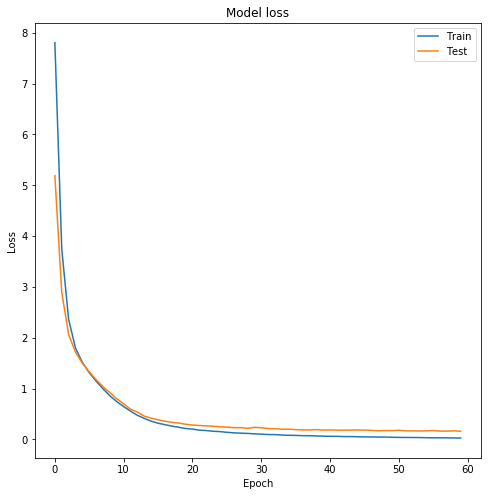

In [5]:
# Train your model for 60 epochs, using X_test and y_test as validation data
h_callback = model.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test), verbose=0)

# Extract from the h_callback object loss and val_loss to plot the learning curve
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

This graph doesn't show overfitting but convergence. It looks like your model has learned all it could from the data and it no longer improves. The test loss, although higher than the training loss, is not getting worse, so we aren't overfitting to the training data.

### Do we need more data?
It's time to check whether the digits dataset model you built benefits from more training examples!

In order to keep code to a minimum, various things are already initialized and ready to use:

- The `model` you just built.
- `X_train`,`y_train`,`X_test`, and `y_test`.
- The `initial_weights` of your model, saved after using `model.get_weights()`.
- A pre-defined list of training sizes: `training_sizes`.
- A pre-defined early stopping callback monitoring loss: `early_stop`.
- Two empty lists to store the evaluation results: `train_accs` and `test_accs`.

Train your model on the different training sizes and evaluate the results on `X_test`. End by plotting the results with plot_results().

In [6]:
def plot_results(train_accs,test_accs):
    plt.plot(training_sizes, train_accs, 'o-', label="Training Accuracy");
    plt.plot(training_sizes, test_accs, 'o-', label="Test Accuracy");
    plt.title('Accuracy vs Number of training samples');
    plt.xlabel('# of training samples');
    plt.ylabel('Accuracy');
    plt.legend(loc="best");

In [7]:
initial_weights = model.get_weights()

Epoch 1/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0237 - accuracy: 1.0000
Epoch 2/50
4/4 [==============================] - 0s 863us/step - loss: 0.0229 - accuracy: 1.0000
Epoch 3/50
4/4 [==============================] - 0s 776us/step - loss: 0.0208 - accuracy: 1.0000
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 1.0000
Epoch 5/50
4/4 [==============================] - 0s 885us/step - loss: 0.0176 - accuracy: 1.0000
Epoch 6/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0165 - accuracy: 1.0000
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 1.0000
Epoch 8/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0145 - accuracy: 1.0000
Epoch 9/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0138 - accuracy: 1.0000
Epoch 10/50
4/4 [==============================] - 0s 823us/step - loss: 0.0130 - accuracy: 1.0000
Epoch 11/50
4/4 [==============

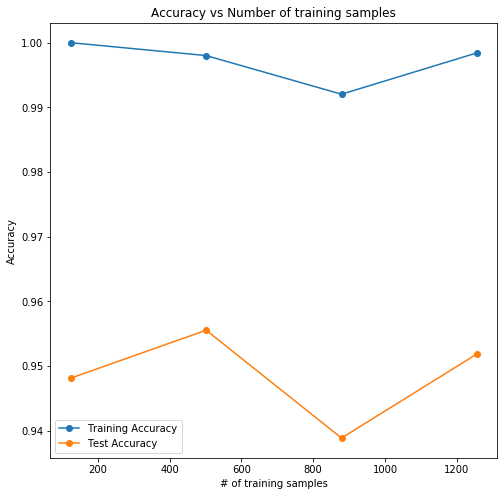

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=1)
train_accs, test_accs = [], []
training_sizes = [125, 502, 879, 1255]

for size in training_sizes:
    # Get a fraction of training data (we only care about the training data)
    X_train_frac, y_train_frac = X_train[:size], y_train[:size]
    
    # Reset the model to the initial weights and train it on the new training data fraction
    model.set_weights(initial_weights)
    model.fit(X_train_frac, y_train_frac, epochs=50, callbacks=[early_stop])
    
    # Evaluate and store both: the training data fraction and the complete test set results
    train_accs.append(model.evaluate(X_train_frac, y_train_frac)[1])
    test_accs.append(model.evaluate(X_test, y_test)[1])
    
# Plot train vs test accuracies
plot_results(train_accs, test_accs)

## Activation functions
![process](image/process.png)

### Comparing activation functions
Comparing activation functions involves a bit of coding, but nothing you can't do!

You will try out different activation functions on the multi-label model you built for your farm irrigation machine in chapter 2. The function `get_model('relu')` returns a copy of this model and applies the `'relu'` activation function to its hidden layer.

You will loop through several activation functions, generate a new model for each and train it. By storing the history callback in a dictionary you will be able to visualize which activation function performed best in the next exercise!

In [9]:
irrigation = pd.read_csv('./dataset/irrigation_machine.csv', index_col=0)
irrigation.head()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [10]:
parcels = irrigation[['parcel_0', 'parcel_1', 'parcel_2']].to_numpy()
sensors = irrigation.drop(['parcel_0', 'parcel_1', 'parcel_2'], axis=1).to_numpy()

X_train, X_test, y_train, y_test = \
    train_test_split(sensors, parcels, test_size=0.3, stratify=parcels)

In [11]:
np.random.seed(1)

# Return a new model with the given activation
def get_model(act_function):
    model = Sequential()
    if act_function == 'leaky_relu':
        model.add(Dense(64, input_shape=(20, ), activation=tf.nn.leaky_relu))
    else:
        model.add(Dense(64, input_shape=(20, ), activation=act_function))

    # Add an output layer of 3 neurons with sigmoid activation
    model.add(Dense(3, activation='sigmoid'))
    # Compile your model with binary crossentropy loss
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

In [12]:
# Activation functions to try
activations = ['relu', 'leaky_relu', 'sigmoid', 'tanh']

# Loop over the activation functions
activation_results = {}

for act in activations:
    # Get a new model with the current activation
    model = get_model(act)
    
    # Fit the model and store the history results
    h_callback = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
    activation_results[act] = h_callback
    print('Finishing with {}...'.format(act))

Finishing with relu...
Finishing with leaky_relu...
Finishing with sigmoid...
Finishing with tanh...


### Comparing activation functions II
For every `h_callback` of each activation function in activation_results:

- `The h_callback.history['val_loss']` has been extracted.
- `The h_callback.history['val_acc']` has been extracted.

In [13]:
val_loss_per_function = {}
val_acc_per_function = {}

for k, v in activation_results.items():
    val_loss_per_function[k] = v.history['val_loss']
    val_acc_per_function[k] = v.history['val_accuracy']

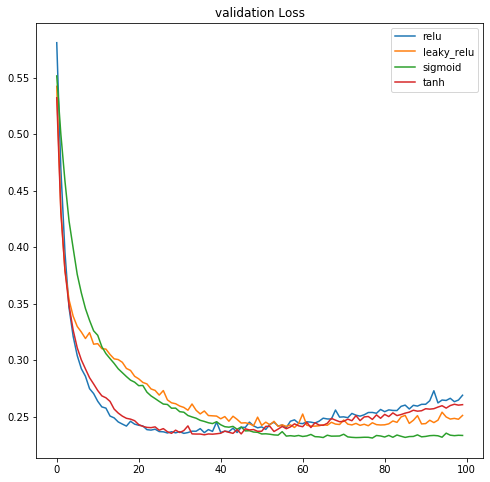

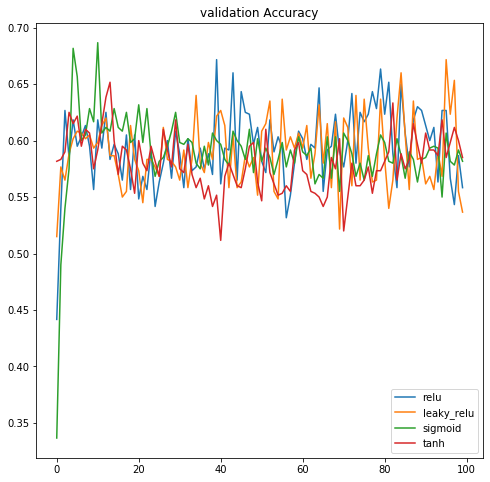

In [14]:
# Create a dataframe from val_loss_per_function
val_loss = pd.DataFrame(val_loss_per_function)

# Call plot on the dataframe
val_loss.plot(title='validation Loss');

# Create a dataframe from val_acc_per_function
val_acc = pd.DataFrame(val_acc_per_function)

# Call plot on the dataframe
val_acc.plot(title='validation Accuracy');

You've plotted both: loss and accuracy curves. It looks like sigmoid activation worked best for this particular model as the hidden layer's activation function. It led to a model with lower validation loss and higher accuracy after 100 epochs.

## Batch size and batch normalization
- Mini-batches
    - Advantages
        - Networks train faster (more weight updates in same amount of time)
        - Less RAM memory required, can train on huge datasets
        - Noise can help networks reach a lower error, escaping local minima
    - Disadvantage
        - More iterations need to be run
        - Need to be adjusted, we need to find a good batch size
- Batch Normalization
    - Advantages
        - Improves gradient flow
        - Allows higher learning rates
        - Reduces dependence on weight initializations
        - Acts as an unintended form of regularization
        - Limits inter covariate shift

### Changing batch sizes
You've seen models are usually trained in batches of a fixed size. The smaller a batch size, the more weight updates per epoch, but at a cost of a more unstable gradient descent. Specially if the batch size is too small and it's not representative of the entire training set.

Let's see how different batch sizes affect the accuracy of a simple binary classification model that separates red from blue dots.

You'll use a batch size of one, updating the weights once per sample in your training set for each epoch. Then you will use the entire dataset, updating the weights only once per epoch.

In [15]:
dots = pd.read_csv('./dataset/dots.csv')
dots.head()

,0,1,2
0,0.242655,0.038320,1
1,0.044330,-0.056673,1
2,-0.786777,-0.757186,0
3,0.004067,0.131172,1
4,-0.164107,0.150650,1


In [16]:
X = dots.iloc[:, :-1]
y = dots.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
def get_model():
    model = Sequential()
    model.add(Dense(4,input_shape=(2,),activation='relu'))
    model.add(Dense(1,activation="sigmoid"))
    model.compile('sgd', 'binary_crossentropy', metrics=['accuracy'])
    return model

In [18]:
# Get a fresh new model with get_model
model = get_model()

# Train your model for 5 epochs with a batch size of 1
model.fit(X_train, y_train, epochs=5, batch_size=1)
print("\n The accuracy when using a batch of size 1 is: ", model.evaluate(X_test, y_test)[1])

Epoch 1/5
700/700 [==============================] - 1s 871us/step - loss: 0.6816 - accuracy: 0.4257
Epoch 2/5
700/700 [==============================] - 1s 875us/step - loss: 0.6075 - accuracy: 0.6529
Epoch 3/5
700/700 [==============================] - 1s 884us/step - loss: 0.5738 - accuracy: 0.7300
Epoch 4/5
700/700 [==============================] - 1s 1ms/step - loss: 0.5431 - accuracy: 0.7629
Epoch 5/5
10/10 [==============================] - 0s 848us/step - loss: 0.4914 - accuracy: 0.8167

 The accuracy when using a batch of size 1 is:  0.8166666626930237


In [19]:
model = get_model()

# Fit your model for 5 epochs with a batch of size the training set
model.fit(X_train, y_train, epochs=5, batch_size=X_train.shape[0])
print("\n The accuracy when using the whole training set as batch-size was: ",
      model.evaluate(X_test, y_test)[1])

Epoch 1/5
1/1 [==============================] - 0s 635us/step - loss: 0.8203 - accuracy: 0.4943
Epoch 2/5
1/1 [==============================] - 0s 439us/step - loss: 0.8197 - accuracy: 0.4914
Epoch 3/5
1/1 [==============================] - 0s 504us/step - loss: 0.8191 - accuracy: 0.4900
Epoch 4/5
1/1 [==============================] - 0s 562us/step - loss: 0.8185 - accuracy: 0.4900
Epoch 5/5
10/10 [==============================] - 0s 859us/step - loss: 0.8030 - accuracy: 0.5133

 The accuracy when using the whole training set as batch-size was:  0.5133333206176758


You can see that accuracy is lower when using a batch size equal to the training set size. This is not because the network had more trouble learning the optimization function: Even though the same number of epochs were used for both batch sizes the number of resulting weight updates was very different!. With a batch of size the training set and 5 epochs we only get 5 updates total, each update computes and averaged gradient descent with all the training set observations. To obtain similar results with this batch size we should increase the number of epochs so that more weight updates take place.

### Batch normalizing a familiar model
Remember the digits dataset you trained in the first exercise of this chapter?

![digits](image/digits_dataset_sample.png)

A multi-class classification problem that you solved using `softmax` and 10 neurons in your output layer.
You will now build a new deeper model consisting of 3 hidden layers of 50 neurons each, using batch normalization in between layers. The `kernel_initializer` parameter is used to initialize weights in a similar way.

In [20]:
from tensorflow.keras.layers import BatchNormalization

# Build your deep network
batchnorm_model = Sequential()
batchnorm_model.add(Dense(50, input_shape=(64, ), activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(10, activation='softmax', kernel_initializer='normal'))

# Compile your model with sgd
batchnorm_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Batch normalization effects
Batch normalization tends to increase the learning speed of our models and make their learning curves more stable. Let's see how two identical models with and without batch normalization compare.

The model you just built `batchnorm_model` is loaded for you to use. An exact copy of it without batch normalization: `standard_model`, is available as well.

You will compare the accuracy learning curves for both models plotting them with compare_histories_acc().

In [21]:
def compare_histories_acc(h1,h2):
    plt.plot(h1.history['accuracy']);
    plt.plot(h1.history['val_accuracy']);
    plt.plot(h2.history['accuracy']);
    plt.plot(h2.history['val_accuracy']);
    plt.title("Batch Normalization Effects");
    plt.xlabel('Epoch');
    plt.ylabel('Accuracy');
    plt.legend(['Train', 'Test', 'Train with Batch Normalization', 'Test with Batch Normalization'], loc='best');

In [22]:
X = np.load('./dataset/digits_pixels.npy')
y = np.load('./dataset/digits_target.npy')

y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
# Build your deep network
standard_model = Sequential()
standard_model.add(Dense(50, input_shape=(64, ), activation='relu', kernel_initializer='normal'))
standard_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
standard_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
standard_model.add(Dense(10, activation='softmax', kernel_initializer='normal'))

# Compile your model with sgd
standard_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

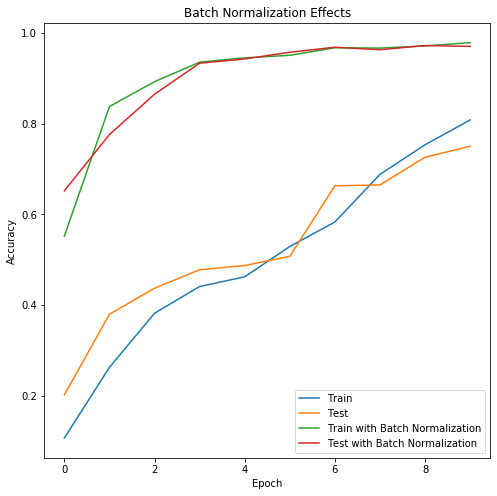

In [24]:
# Train your standard model, storing its history callback
h1_callback = standard_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=0)

# Train the batch normalized model you recently built, store its history callback
h2_callback = batchnorm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=0)

# Call compare_histories_acc passing in both model histories
compare_histories_acc(h1_callback, h2_callback)

You can see that for this deep model batch normalization proved to be useful, helping the model obtain high accuracy values just over the first 10 training epochs.

## Hyperparameter tuning
- Neural network hyperparameters
    - Number of layers
    - Number of neurons per layer
    - Layer order
    - Layer activations
    - Batch sizes
    - Learning rates
    - Optimizers
    - ...
- Tips for neural networks hyperparameter tuning
    - Random search is preferred over grid search
    - Don't use many epochs
    - Use a smaller sample of your dataset
    - Play with batch sizes, activations, optimizers and learning rates

### Preparing a model for tuning
Let's tune the hyperparameters of a binary classification model that does well classifying the breast cancer dataset.

You've seen that the first step to turn a model into a sklearn estimator is to build a function that creates it. The definition of this function is important since hyperparameter tuning is carried out by varying the arguments your function receives.

Build a simple `create_model()` function that receives both a learning rate and an activation function as arguments.



In [31]:
# Creates a model given an activation and learning rate
def create_model(learning_rate=0.001, activation='relu'):
    # Create an Adam optimizer with the given learning rate
    opt = tf.keras.optimizers.Adam(lr=learning_rate)
    
    # Create your binary classification model
    model = Sequential()
    model.add(Dense(128, input_shape=(30, ), activation=activation))
    model.add(Dense(256, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile your model with your optimizer, loss and metrics
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

### Tuning the model parameters
It's time to try out different parameters on your model and see how well it performs!

The `create_model()` function you built in the previous exercise is ready for you to use.

Since fitting the `RandomizedSearchCV` object would take too long, the results you'd get are printed in the `show_results()` function. You could try `random_search.fit(X,y)` in the console yourself to check it does work after you have built everything else, but you will probably timeout the exercise (so copy your code first if you try this or you can lose your progress!).

You don't need to use the optional `epochs` and `batch_size` parameters when building your `KerasClassifier` object since you are passing them as params to the random search and this works already.

In [26]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)

In [27]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

# Create a KerasClassifier
model = KerasClassifier(build_fn=create_model)

# Define the parameters to try out
params = {
    'activation': ['relu', 'tanh'],
    'batch_size': [32, 128, 256],
    'epochs': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create a randomize search cv object passing in the parameters to try out
random_search = RandomizedSearchCV(model, param_distributions=params, cv=KFold(3))
random_search_results = random_search.fit(X, y, verbose=0)

# Print results
print("Best: {} using {}".format(random_search_results.best_score_,
                                 random_search_results.best_params_))

2/2 [==============================] - 0s 850us/step - loss: 0.8118 - accuracy: 0.5926
Best: 0.9279587864875793 using {'learning_rate': 0.001, 'epochs': 50, 'batch_size': 32, 'activation': 'tanh'}


### Training with cross-validation
Time to train your model with the best parameters found: 0.01 for the learning rate, 100 epochs, a 128 batch_size and `relu` activations. (Maybe the result will be different)

The `create_model()` function from the previous exercise is ready for you to use. `X` and `y` are loaded as features and labels.

Use the best values found for your model when creating your `KerasClassifier` object so that they are used when performing cross_validation.

End this chapter by training an awesome tuned model on the breast cancer dataset!

In [32]:
from sklearn.model_selection import cross_val_score

def create_model_d(func):
    return func(0.01, 'relu')

# Create a KerasClassifier
model = KerasClassifier(build_fn=create_model, 
                        epochs=100, batch_size=256, verbose=0)

# Calculate the accuracy score for each fold
kfolds = cross_val_score(model, X, y, cv=3, n_jobs=1)

# Print the mean accuracy
print('The mean accuracy was: ', kfolds.mean())

# Print the accuracy standard deviation
print('With a standard deviation of: ', kfolds.std())

The mean accuracy was:  0.9262136816978455
With a standard deviation of:  0.011227942887531294
